- Cho tập dữ liệu sau:
    + x = [1, 3, 3, 5, 5, 6, 8, 9, 10, 12]
    + y = [2, 2, 4, 2, 4, 6, 6, 8, 5, 7]

- Lấy ngẫu nhiên 8 điểm (x, y) làm tập huấn luyện, tìm tham số (a, b) của mô hình tuyến tính ax+b, đánh giá MSE khi áp dụng mô hình huyến luyện và tập kiểm thử,
trực quan hóa bài toán (data_train, data_test, đường hồi quy)

In [330]:
import numpy as np
import matplotlib.pyplot as plt

In [331]:
x = [1, 3, 3, 5, 5, 6, 8, 9, 10, 12]
y = [2, 2, 4, 2, 4, 6, 6, 8, 5, 7]

In [332]:
n = len(x)

In [333]:
index = np.random.permutation(n)

In [334]:
index

array([2, 4, 5, 1, 7, 0, 9, 3, 8, 6], dtype=int32)

In [335]:
train = index[:int(n*0.8)]
train

array([2, 4, 5, 1, 7, 0, 9, 3], dtype=int32)

In [336]:
test = index[int(n*0.8):]
test

array([8, 6], dtype=int32)

In [337]:
X = np.array(x)
Y = np.array(y)

In [338]:
X_train  = X[train]
y_train = Y[train]

X_train, y_train

(array([ 3,  5,  6,  3,  9,  1, 12,  5]), array([4, 4, 6, 2, 8, 2, 7, 2]))

In [339]:
X_test  = X[test]
y_test = Y[test]

X_test, y_test

(array([10,  8]), array([5, 6]))

In [340]:
Xs = np.expand_dims(X_train , axis=1)
Xs = np.concatenate((Xs, np.ones_like(Xs)), axis=1)

Ys = np.expand_dims(y_train , axis=1)
Ys


array([[4],
       [4],
       [6],
       [2],
       [8],
       [2],
       [7],
       [2]])

# Tìm 2 tham số a, b

In [349]:

param = np.linalg.inv((Xs.T).dot(Xs)).dot(Xs.T).dot(Ys)
param

array([[0.5625 ],
       [1.28125]])

In [342]:
y_test_pred = []
for x in X_test:
    y_test_pred.append(param[0] * x + param[1])

y_test_pred

[array([6.90625]), array([5.78125])]

In [343]:
y_test_pred = np.array(y_test_pred)
y_test_pred

array([[6.90625],
       [5.78125]])

In [344]:
# Tính MSE
mse = np.mean((y_test_pred - y_test) ** 2)
mse

np.float64(1.2783203125000029)

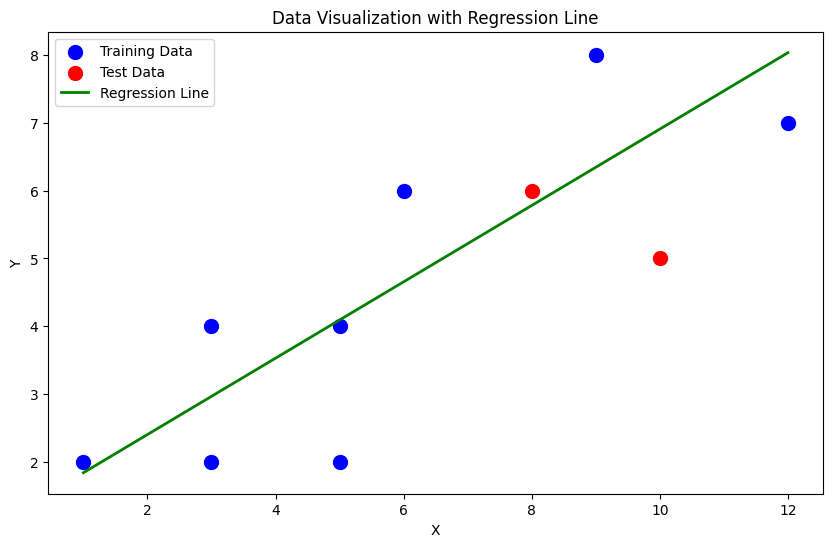

In [348]:
# Tạo biểu đồ
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color='blue', label='Training Data', s=100)
plt.scatter(X_test, y_test, color='red', label='Test Data', s=100)


y_values = param[0][0] * X + param[1][0] # bố dg tao cac gia tri x cho đương hồi quy 

plt.plot(X, y_values, color='green', label='Regression Line', linewidth=2)




plt.title('Data Visualization with Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()